<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Seaborn基础" data-toc-modified-id="Seaborn基础-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Seaborn基础</a></span><ul class="toc-item"><li><span><a href="#关于Matplotlib与Seaborn" data-toc-modified-id="关于Matplotlib与Seaborn-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>关于Matplotlib与Seaborn</a></span></li><li><span><a href="#风格选择" data-toc-modified-id="风格选择-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>风格选择</a></span></li><li><span><a href="#自定义坐标轴" data-toc-modified-id="自定义坐标轴-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>自定义坐标轴</a></span></li><li><span><a href="#自定义绘图元素比例" data-toc-modified-id="自定义绘图元素比例-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>自定义绘图元素比例</a></span></li></ul></li><li><span><a href="#数据集分布的可视化" data-toc-modified-id="数据集分布的可视化-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据集分布的可视化</a></span><ul class="toc-item"><li><span><a href="#单变量分布图sns.distplot()" data-toc-modified-id="单变量分布图sns.distplot()-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>单变量分布图sns.distplot()</a></span></li><li><span><a href="#二元分布图" data-toc-modified-id="二元分布图-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>二元分布图</a></span><ul class="toc-item"><li><span><a href="#散点图sns.jointplot()" data-toc-modified-id="散点图sns.jointplot()-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>散点图sns.jointplot()</a></span></li><li><span><a href="#Hexbin-图" data-toc-modified-id="Hexbin-图-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Hexbin 图</a></span></li><li><span><a href="#核密度估计" data-toc-modified-id="核密度估计-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>核密度估计</a></span></li></ul></li><li><span><a href="#可视化数据集中成对的关系" data-toc-modified-id="可视化数据集中成对的关系-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>可视化数据集中成对的关系</a></span><ul class="toc-item"><li><span><a href="#矩阵图sns.pairplot()" data-toc-modified-id="矩阵图sns.pairplot()-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>矩阵图sns.pairplot()</a></span></li><li><span><a href="#PairGrid" data-toc-modified-id="PairGrid-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>PairGrid</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

# Seaborn基础

## 关于Matplotlib与Seaborn


- 要实现复杂的数据可视化，要写大量的样板代码。
- Matplotlib比Pandas更早开发，要使用Matplotlib实现DataFrame的数据可视化，相对Seaborn比较麻烦。
- Seaborn是在Matplotlib基础上开发的一套API，为图形样式和颜色设置提供合理的选择，同时为很多常用的统计图形提供专门的高级函数调用。
- Pandas与DataFrame有机结合，是使用Matplotlib时很好的附加工具。

## 风格选择

运行之前的代码：

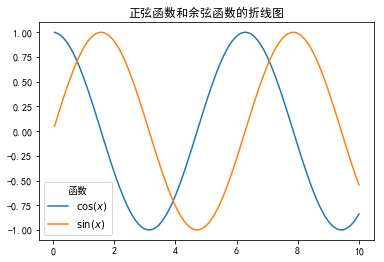

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# 解决中文乱码问题
def hehe():
    plt.rcParams['font.sans-serif'] = ['Simhei']

    x=np.linspace(0.05,10,100)
    y_01=np.cos(x)
    y_02=np.sin(x)

    plt.plot(x,y_01,ls="-",label=r"$\cos(x)$")
    plt.plot(x,y_02,ls="-",label=r"$\sin(x)$")

    plt.legend(loc="lower left",title="函数",) #或者写loc=3
    plt.title("正弦函数和余弦函数的折线图");

hehe()

- seaborn的风格，它们分别是：
    - darkgrid（默认）
    - whitegrid
    - dark
    - white
    - ticks
- sns.set()可以用来重置Seaborn默认的主题。
- 运行下面的sns.set()语句之后，会将接下来运行的Matplotlib绘图设置成Seaborn的默认的主题，重新运行上面的图：

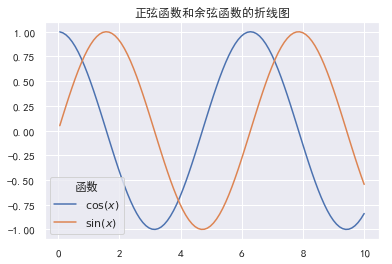

In [3]:
import seaborn as sns
sns.set()
hehe()

如果想改变Seaborn主题，可以使用以下语句：
- axes_style()
- set_style()
比如我们又想将默认的darkgrid主题改成ticks：

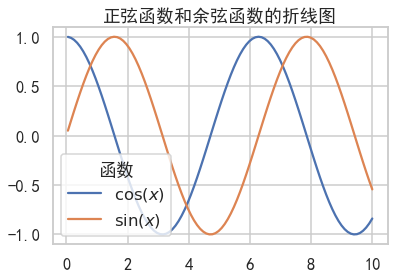

In [13]:
sns.set_style("whitegrid")
hehe()

## 自定义坐标轴

如果你不想要轴脊柱（图形边框的右上角两条轴），可以通过sns.despine()来移除（先画图后移除）：

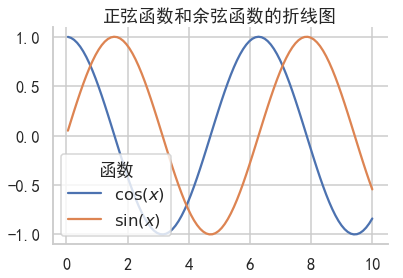

In [15]:
hehe()
sns.despine()

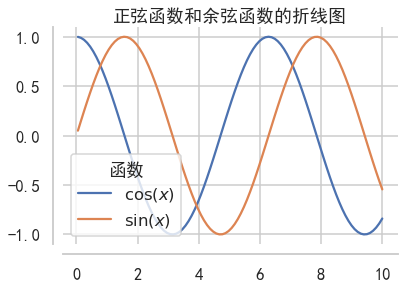

In [16]:
hehe()
sns.despine(offset=10);  #  绝对距离，以点为单位

# sns.despine(left=True);

## 自定义绘图元素比例

Seaborn有一套的参数可以控制绘图元素的比例，有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。

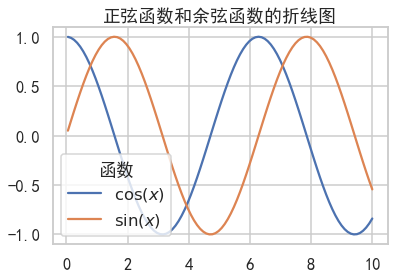

In [17]:
sns.set_context("talk")
hehe()

# 数据集分布的可视化

In [18]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sns.__version__

'0.9.0'

In [20]:
sns.set(color_codes=True)
np.random.seed(100)  # 随机数生成种子

## 单变量分布图sns.distplot()

在 seaborn 中，快速观察单变量分布的最方便的方法就是使用 distplot() 函数，默认会使用柱状图(histogram)来绘制。
- bin：直方图在横坐标的数据值范围内均等分的形成一定数量的数据段数量。
- hist：bool，可选，是否绘制（标准化）直方图。
- kde：bool，可选，是否绘制核密度估计曲线（高斯）。
- rug : bool, 可选，在每个观察点上的垂直小标签。

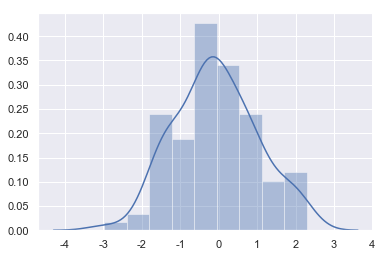

In [23]:
x = np.random.normal(size=100)
sns.distplot(x);
#如果运行代码出现报错，那么运行pip install --upgrade scipy

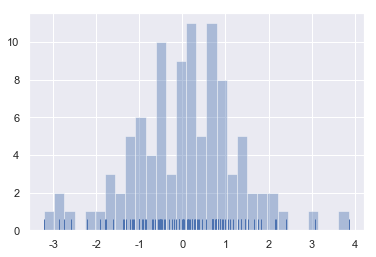

In [27]:
x = np.random.normal(size=100)
sns.distplot(x,hist=True, bins=30,kde=False,rug=True);
# kde, 是否画核密度曲线
# rug，是否将数组中的数据点画出来作为坐标轴的刻度线

## 二元分布图

### 散点图sns.jointplot()

在 seaborn 中，对于双变量分布的可视化，最简单的方法就是使用 joinplot() 函数，它能够创建一个多面板图形来展示两个变量之间的联合关系，以及每个轴上单变量的分布情况。

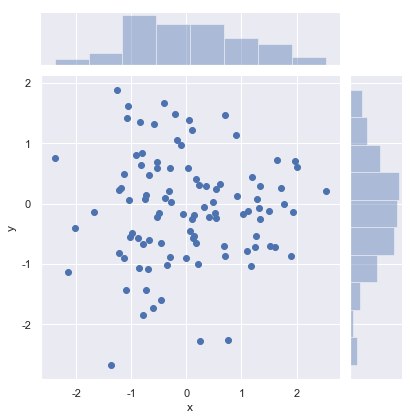

In [30]:
x=np.random.randn(100)  
y=np.random.randn(100)       #从0到1之间，生成100个

df = pd.DataFrame({"x":x,"y":y})

sns.jointplot(x="x", y="y", data=df);

### Hexbin 图
- 绘图对于相对大的数据集,使用“hexbin” 图最好，它展示了落在六角形箱内的观测量。
- “hexbin” 图可以通过 matplotlib 的 plt.hexbin 函数绘制。
- “hexbin” 图也可以作为 jointplot 的一种类型参数使用，设置sns.jointplot()内的kind="hex"。
- 使用白色背景的时候视觉效果最好。

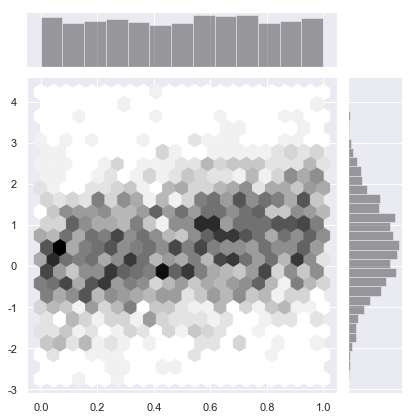

In [32]:
sns.axes_style("white")

x=np.random.rand(2000)  
y=x+np.random.randn(2000)      

sns.jointplot(x=x, y=y, kind="hex", color="k");

### 核密度估计

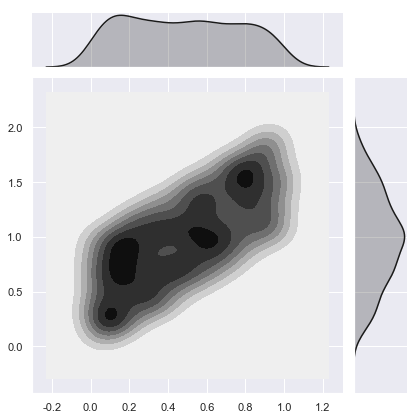

In [14]:
sns.set()

x=np.random.rand(1000)  
y=x+np.random.rand(1000)      

sns.jointplot(x=x, y=y, kind="kde", color="k");

也可以用 kdeplot 函数来绘制一个二维的核密度图形。

## 可视化数据集中成对的关系

### 矩阵图sns.pairplot()

当你需要对多维数据集进行可视化时，可以使用矩阵图。

In [34]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


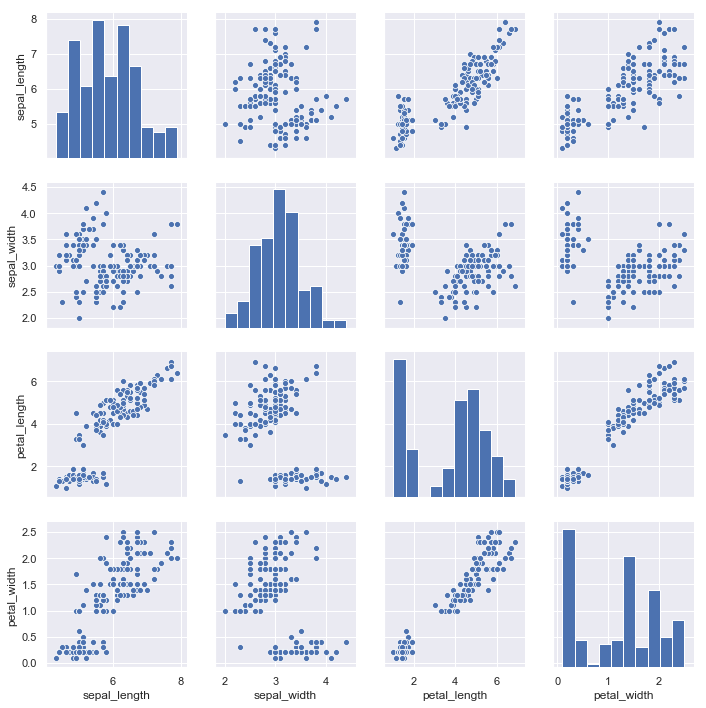

In [17]:
sns.pairplot(iris);

### PairGrid

pairplot() 函数建立在 PairGrid 对象之上，直接使用可以更灵活。

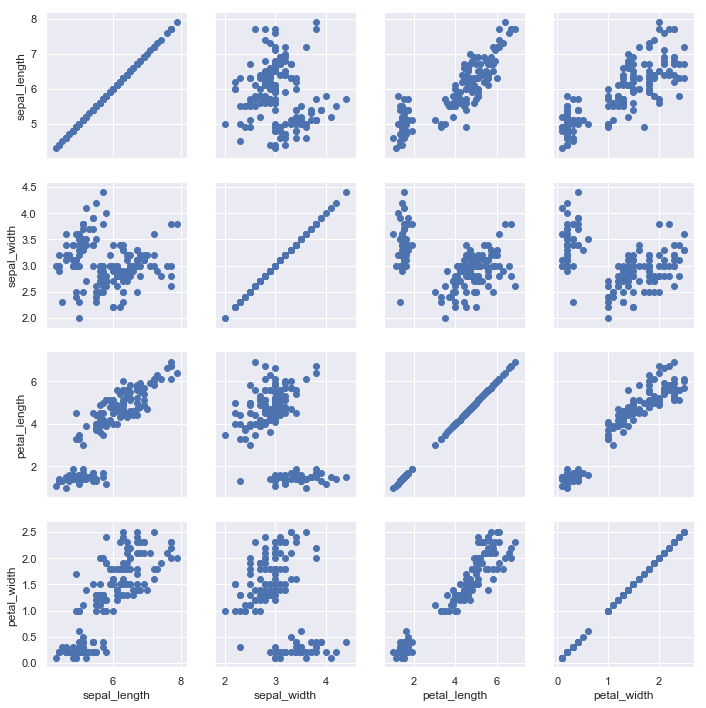

In [18]:
g = sns.PairGrid(iris)
g.map(plt.scatter);   #所有的子图都用散点图绘制

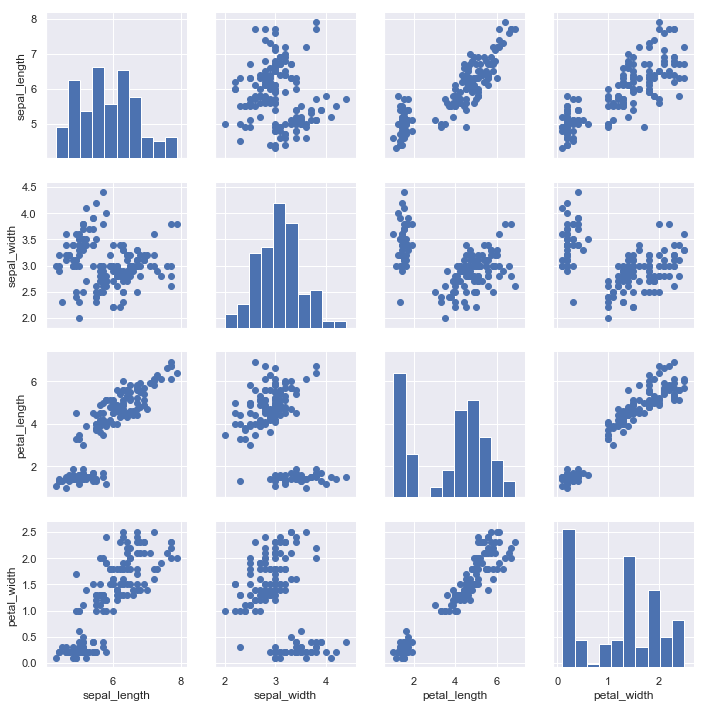

In [20]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)   #对角线上的子图用直方图

g.map_offdiag(plt.scatter);   #对角线上以外的子图用散点图